In [1]:
from maxent_disaggregation import maxent_disagg
from maxent_disaggregation import plot_samples_hist, plot_covariances

import numpy as np
from maxent_disaggregation.shares import generalized_dirichlet 
import corner

In [10]:
mean_aggregate = 10
sd_aggregate = 0.5
min_aggregate = 0
max_aggregate = np.inf
shares_disaggregates = [0.4, 0.25, 0.2, 0.15]
sds_shares = [0.1, np.nan, 0.04, np.nan]



In [ ]:
samples, samples_agg, samples_shares, gammar_par = maxent_disagg(n=10000, 
                        mean_0=mean_aggregate,
                        sd_0=sd_aggregate,
                        # min_0=min_aggregate,
                        # max_0=max_aggregate,
                        shares=shares_disaggregates, 
                        sds=sds_shares,
                        return_shares=True,
                        return_aggregate=True,
                        )

In [12]:
samples.min(axis=0), samples.max(axis=0), samples.mean(axis=0), samples.std(axis=0)

(array([8.43763543e-01, 5.47603873e-03, 7.57143149e-01, 4.94555194e-05]),
 array([7.81262822, 7.05683742, 3.93172656, 6.63030296]),
 array([4.01329509, 2.48645703, 2.00111216, 1.50374516]),
 array([1.02460966, 1.30909566, 0.41029591, 1.18020337]))

In [13]:
samples_shares.mean(axis=0)

array([0.40109249, 0.24853831, 0.20001695, 0.15035225])

In [14]:
test = generalized_dirichlet(1000, [0.4,0.6], np.asarray([0.0001, 0.1]))

test.mean(axis=0), test.std(axis=0), test.min(axis=0), test.max(axis=0)

(array([0.40408666, 0.59591334]),
 array([0.03894363, 0.03894363]),
 array([0.29710403, 0.48403245]),
 array([0.51596755, 0.70289597]))

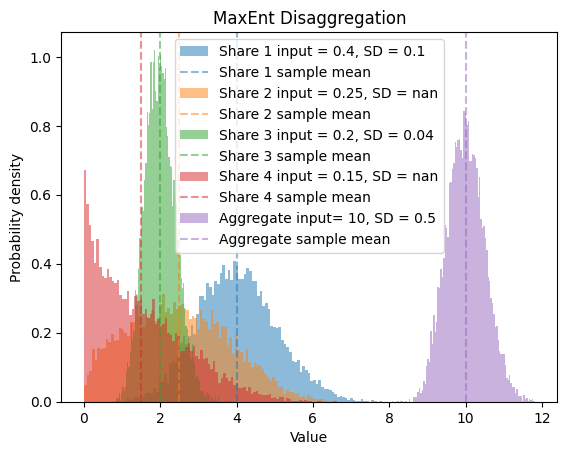

In [15]:
plot_samples_hist(samples, 
                  mean_0=mean_aggregate, 
                  sd_0=sd_aggregate, 
                  shares=shares_disaggregates, 
                  sds=sds_shares,
                  save=False,
                  filename="/Users/ajakobs/Documents/code_projects/maxent_disaggregation/docs/content/data/Quickstart_example.svg")

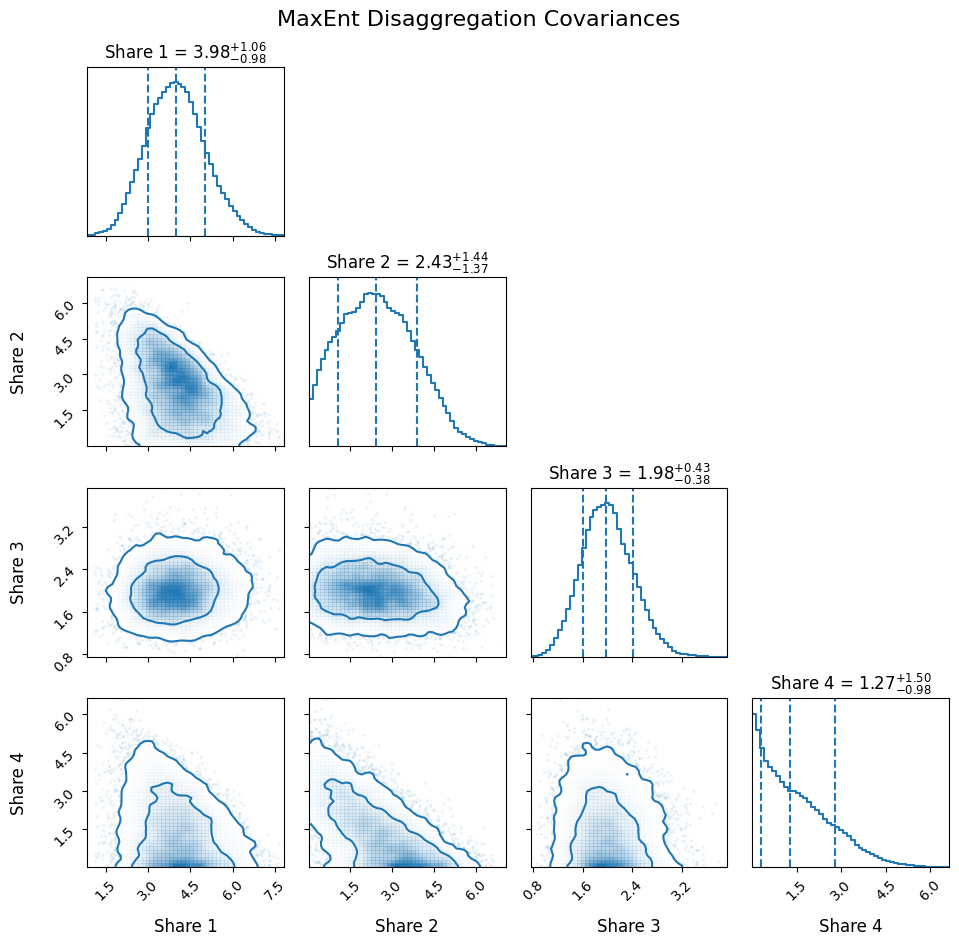

In [18]:
plot_covariances(samples,
                  save=True,
                  filename="/Users/ajakobs/Documents/code_projects/maxent_disaggregation/docs/content/data/Quickstart_example_covariances.svg")

## Check generalised Dirichlet

In [32]:
def print_stats(samples):
    print("Mean of samples: ", samples.mean(axis=0))
    print("Std of samples: ", samples.std(axis=0))
    print("Min of samples: ", samples.min(axis=0))
    print("Max of samples: ", samples.max(axis=0))

In [61]:

shares = np.asarray([0.4, 0.4, 0.2])
sds = np.asarray([0.0001, 0.2, 0.1])
# Generate samples from the generalized Dirichlet distribution
samples_generalized_dirichlet = generalized_dirichlet(10000,shares, sds)


In [62]:
print_stats(samples_generalized_dirichlet)

Mean of samples:  [0.41791544 0.38194062 0.20014394]
Std of samples:  [0.09093938 0.12076843 0.08559837]
Min of samples:  [0.17093546 0.02755892 0.01387738]
Max of samples:  [0.78642241 0.7554888  0.58625228]


In [63]:
mean = 10
sd = 0.5
samples, _ = maxent_disagg(n=10000,
                        mean_0=mean,
                        sd_0=0.5,
                        shares=shares,
                        sds=sds,
                        return_shares=False,
                        return_aggregate=True,
                        )


Sds above threshold: [9.17570149e+02 3.97629327e-01],             sds: [1.e-04 2.e-01], sample_sd: [0.09185701 0.12047413],             indices: [0 1]


/Users/ajakobs/Documents/code_projects/maxent_disaggregation/maxent_disaggregation/shares.py:438: UserWarning: The generated samples for the shares have a standard deviation that is more than 20.0% different from the specified sd's. Please note that the specified sd's might be incompetibale with the other constraints. Please check your inputs. To surpress this warning you can set a higher threshold_sd.
  warnings.warn(


In [64]:
print_stats(samples)


Mean of samples:  [4.19074138 3.82627038 1.98072839]
Std of samples:  [0.94424641 1.21744017 0.85396831]
Min of samples:  [1.76769033 0.2233907  0.13775585]
Max of samples:  [8.56171506 8.26737986 5.62979437]


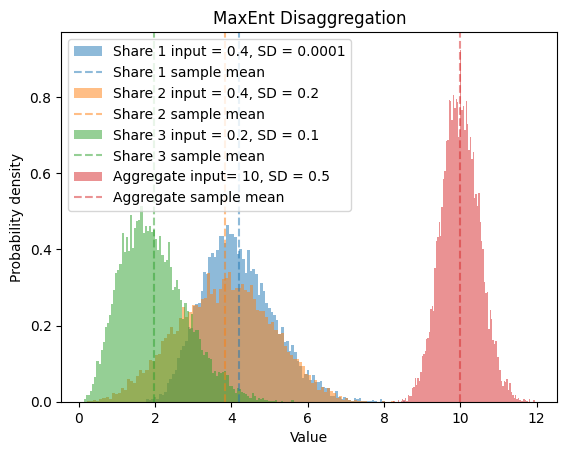

In [65]:
plot_samples_hist(samples, shares=shares, sds=sds, 
                  mean_0=mean, 
                  sd_0=sd,
                  save=False,
)